#**INTEGRANTES DEL EQUIPO-PIA**
##Edgar Alejandro Bravo Escalona 2035494
##René Alejandro Presas Rivera 1969668          
##Orlando Aldair Beltran Luna 1878812


#Importar Bibliotecas
En estas líneas, se importan las bibliotecas necesarias: TensorFlow y Keras para crear y entrenar modelos de redes neuronales, matplotlib para la visualización de imágenes y NumPy para el manejo de arreglos.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#CIFAR100
Aquí, se carga el conjunto de datos CIFAR-100. train_images y test_images contienen las imágenes de entrenamiento y prueba, respectivamente, y train_labels y test_labels contienen las etiquetas correspondientes.

Tambien se normalizan los valores de píxeles en las imágenes para que estén en el rango de 0 a 1 dividiéndolos por 255.



In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

169001437/169001437 [==============================] - 2s 0us/step


#Descarga y preparación del Conjunto de Datos CIFAR100  
Este conjunto de datos es igual que el CIFAR-10, excepto que tiene 100 clases que contienen 600 imágenes cada una. Hay 500 imágenes de entrenamiento y 100 imágenes de prueba por clase. Las 100 clases del CIFAR-100 se agrupan en 20 superclases..

Aquí, se define la lista de nombres de clase para las 100 clases en el conjunto de datos CIFAR-100. Esto se utilizará para etiquetar las imágenes en la visualización.


Para comprobar que el conjunto de datos tiene el aspecto correcto, vamos a trazar las primeras 25 imágenes del conjunto de entrenamiento y mostrar el nombre de la clase debajo de cada imagen:


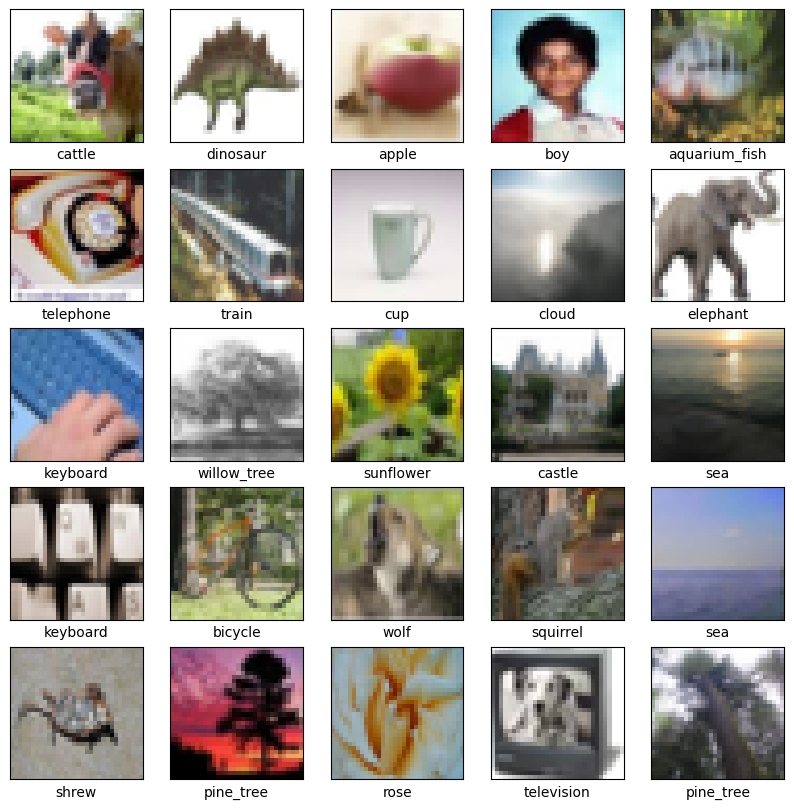

In [ ]:
class_names = [
            "apple",
            "aquarium_fish",
            "baby",
            "bear",
            "beaver",
            "bed",
            "bee",
            "beetle",
            "bicycle",
            "bottle",
            "bowl",
            "boy",
            "bridge",
            "bus",
            "butterfly",
            "camel",
            "can",
            "castle",
            "caterpillar",
            "cattle",
            "chair",
            "chimpanzee",
            "clock",
            "cloud",
            "cockroach",
            "couch",
            "cra",
            "crocodile",
            "cup",
            "dinosaur",
            "dolphin",
            "elephant",
            "flatfish",
            "forest",
            "fox",
            "girl",
            "hamster",
            "house",
            "kangaroo",
            "keyboard",
            "lamp",
            "lawn_mower",
            "leopard",
            "lion",
            "lizard",
            "lobster",
            "man",
            "maple_tree",
            "motorcycle",
            "mountain",
            "mouse",
            "mushroom",
            "oak_tree",
            "orange",
            "orchid",
            "otter",
            "palm_tree",
            "pear",
            "pickup_truck",
            "pine_tree",
            "plain",
            "plate",
            "poppy",
            "porcupine",
            "possum",
            "rabbit",
            "raccoon",
            "ray",
            "road",
            "rocket",
            "rose",
            "sea",
            "seal",
            "shark",
            "shrew",
            "skunk",
            "skyscraper",
            "snail",
            "snake",
            "spider",
            "squirrel",
            "streetcar",
            "sunflower",
            "sweet_pepper",
            "table",
            "tank",
            "telephone",
            "television",
            "tiger",
            "tractor",
            "train",
            "trout",
            "tulip",
            "turtle",
            "wardrobe",
            "whale",
            "willow_tree",
            "wolf",
            "woman",
            "worm"
        ]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#Creación de la base convolucional
Se define el modelo de la red neuronal convolucional (CNN) con tres capas convolucionales seguidas de capas de max-pooling. Esto es típico en arquitecturas CNN.

In [ ]:
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Vamos a mostrar la arquitectura de su modelo hasta ahora:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

Se agregan capas de aplanamiento, capas completamente conectadas y una capa de salida con 100 unidades para las 100 clases en CIFAR-100.



In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100))

Esta es la arquitectura completa de su modelo:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

El modelo se compila con el optimizador 'adam', la función de pérdida 'SparseCategoricalCrossentropy', y se especifica que se evaluará la precisión.



In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

El modelo se entrena con los datos de entrenamiento durante 10 épocas y se utiliza el conjunto de validación para evaluar el rendimiento durante el entrenamiento.

# Compilar y entrenar el modelo

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 67s 41ms/step - loss: 3.1401 - accuracy: 0.2331 - val_loss: 2.8218 - val_accuracy: 0.2916
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 2.5167 - accuracy: 0.3445 - val_loss: 2.6875 - val_accuracy: 0.3206
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 2.3735 - accuracy: 0.3779 - val_loss: 2.6498 - val_accuracy: 0.3292
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 2.2831 - accuracy: 0.3967 - val_loss: 2.6451 - val_accuracy: 0.3333
Epoch 5/10
1563/1563 [==============================] - 66s 43ms/step - loss: 2.2083 - accuracy: 0.4129 - val_loss: 2.6204 - val_accuracy: 0.3519
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 2.1530 - accuracy: 0.4234 - val_loss: 2.6099 - val_accuracy: 0.3456
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 2.0948 - accuracy: 0.4379 - val_loss: 2.6649 -

In [ ]:
print(acc, val_acc, loss, val_loss)


[0.08947999775409698, 0.1952199935913086, 0.24955999851226807, 0.28957998752593994, 0.3175399899482727, 0.3418999910354614, 0.36094000935554504, 0.37727999687194824, 0.39166000485420227, 0.4074000120162964] [0.1525000035762787, 0.225600004196167, 0.25839999318122864, 0.2858000099658966, 0.3010999858379364, 0.32659998536109924, 0.31929999589920044, 0.3431999981403351, 0.34619998931884766, 0.3513000011444092] [3.9873461723327637, 3.3284378051757812, 3.027944803237915, 2.838502883911133, 2.6933302879333496, 2.5770933628082275, 2.4894115924835205, 2.4094674587249756, 2.342681646347046, 2.2787864208221436] [3.55999493598938, 3.1729507446289062, 3.0004498958587646, 2.868833303451538, 2.801858901977539, 2.6927490234375, 2.6786985397338867, 2.591874122619629, 2.583470106124878, 2.5919835567474365]


In [ ]:
epochs_range = range(10)
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
print(acc,val_acc,loss,val_loss)

[0.23307999968528748, 0.34450000524520874, 0.377920001745224, 0.3967199921607971, 0.41290000081062317, 0.4233799874782562, 0.4379200041294098, 0.447519987821579, 0.4614599943161011, 0.4697200059890747] [0.29159998893737793, 0.3206000030040741, 0.32919999957084656, 0.33329999446868896, 0.35190001130104065, 0.3456000089645386, 0.3450999855995178, 0.3515999913215637, 0.3456000089645386, 0.3488999903202057] [3.140119791030884, 2.516667127609253, 2.3735337257385254, 2.283118963241577, 2.2082881927490234, 2.153010606765747, 2.0947515964508057, 2.0413033962249756, 1.9991586208343506, 1.9583956003189087] [2.8218019008636475, 2.687467575073242, 2.6497535705566406, 2.6451478004455566, 2.62036395072937, 2.6098954677581787, 2.664924144744873, 2.625659465789795, 2.644770622253418, 2.722843647003174]


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 2.7228 - accuracy: 0.3489 - 3s/epoch - 11ms/step


# Evaluación del Modelo

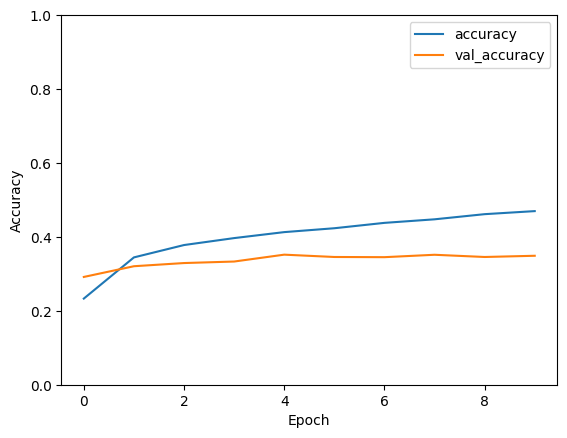

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()


In [ ]:
print(test_acc)

0.3488999903202057




Se trazan las curvas de precisión en el entrenamiento y en la validación a lo largo de las épocas.


In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 4s 11ms/step


#Predicciones
Se hacen 5 predicciones en el conjunto de prueba.



In [ ]:
subset_images = test_images[:5]
subset_labels = test_labels[:5]

predictions = model.predict(subset_images)

1/1 [==============================] - 0s 129ms/step


Se selecciona un subconjunto de imágenes del conjunto de prueba, se hacen predicciones en estas imágenes y se muestra el índice de las clases predichas y sus nombres correspondientes.



In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
print("Índices de clases predichas:", predicted_classes)

Índices de clases predichas: [30 33 29 84 71]


In [ ]:
predicted_class_names = [class_names[i] for i in predicted_classes]

In [ ]:
print("Nombres de clases predichas:", predicted_class_names)

Nombres de clases predichas: ['dolphin', 'forest', 'dinosaur', 'table', 'sea']
